In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
excel_path = pd.ExcelFile('Summary_results.xlsx')
df = pd.read_excel(excel_path)

df

,model,method,dataset,accuracy,identified_answers,num_samples,time
0,TinyLlama_v1.1,greedy,GSM8K,0.03,149,150,1484.67
1,TinyLlama_v1.1,cot-decoding,GSM8K,0.02,145,150,5662.16
2,Qwen2.5-0.5B,greedy,GSM8K,0.27,150,150,897.69
3,Qwen2.5-0.5B,cot-decoding,GSM8K,0.26,150,150,6132.64
4,Qwen2.5-0.5B-Instruct,greedy,GSM8K,0.28,150,150,556.32
5,Qwen2.5-0.5B-Instruct,cot-decoding,GSM8K,0.26,150,150,5518.51
6,TinyLlama_v1.1,greedy,Year Parity,0.60,98,100,524.72
7,TinyLlama_v1.1,cot-decoding,Year Parity,0.36,74,100,3916.94
8,Qwen2.5-0.5B,greedy,Year Parity,0.35,85,100,104.50
9,Qwen2.5-0.5B,cot-decoding,Year Parity,0.53,88,100,1692.24


In [3]:
# adding two new columns
df['accuracy_percent'] = df['accuracy'] * 100
df['time_per_sample'] = round(df['time'] / df['num_samples'], 2)

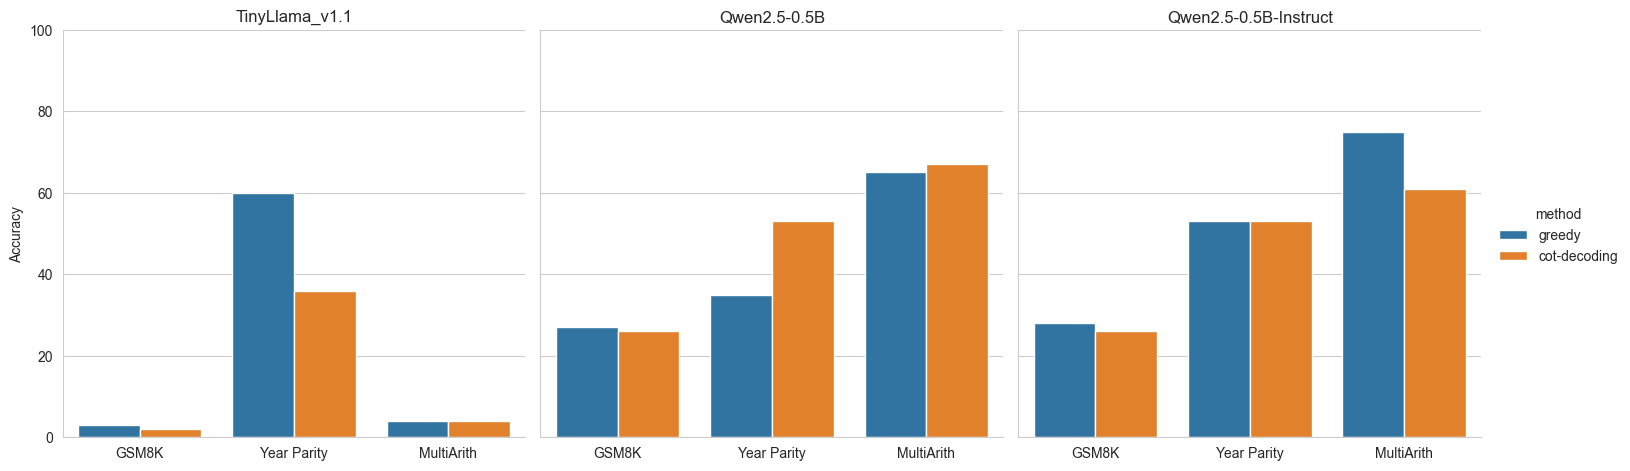

In [6]:
sns.set_style('whitegrid')
c = sns.catplot(
    df, kind="bar",
    x="dataset", y="accuracy_percent", col="model", hue="method", #legend=False
)
#plt.legend(loc='upper left')
c.set_axis_labels("", "Accuracy")
plt.ylim(0,100)
#c.add_legend(legend_data={"Greedy": df[df['method'] == 'greedy'], "Cot-Decoding": df[df['method']] == 'cot-decoding'}, title="Method", label_order=["Greedy", "CoT-decoding"])
for (col_key),ax in c.axes_dict.items():
    ax.set_title(f"{col_key}")

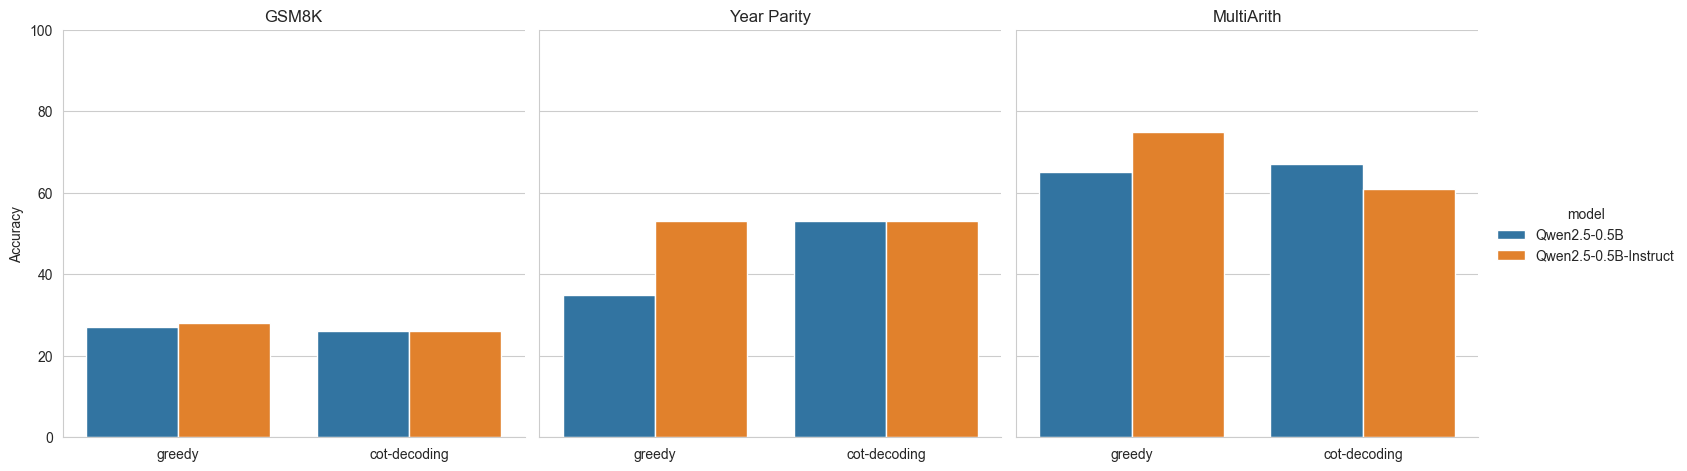

In [16]:
sns.set_style('whitegrid')
c = sns.catplot(
    #df[(df["model"] == "Qwen") | (df["model"] == "Qwen-Instruct")], kind="bar",
    df[(df["model"] == "Qwen2.5-0.5B") | (df["model"] == "Qwen2.5-0.5B-Instruct")], kind="bar",
    x="method", y="accuracy_percent", col="dataset", hue="model"
)
#plt.legend(loc='upper left')
c.set_axis_labels("", "Accuracy")
titles = ["GSM8K", "Year Parity", "MultiArith"]
#for title in titles:
#c.axes.set_titles("GSM8K")
plt.ylim(0.0, 100.0)

c.axes_dict
for (col_key),ax in c.axes_dict.items():
    ax.set_title(f"{col_key}")


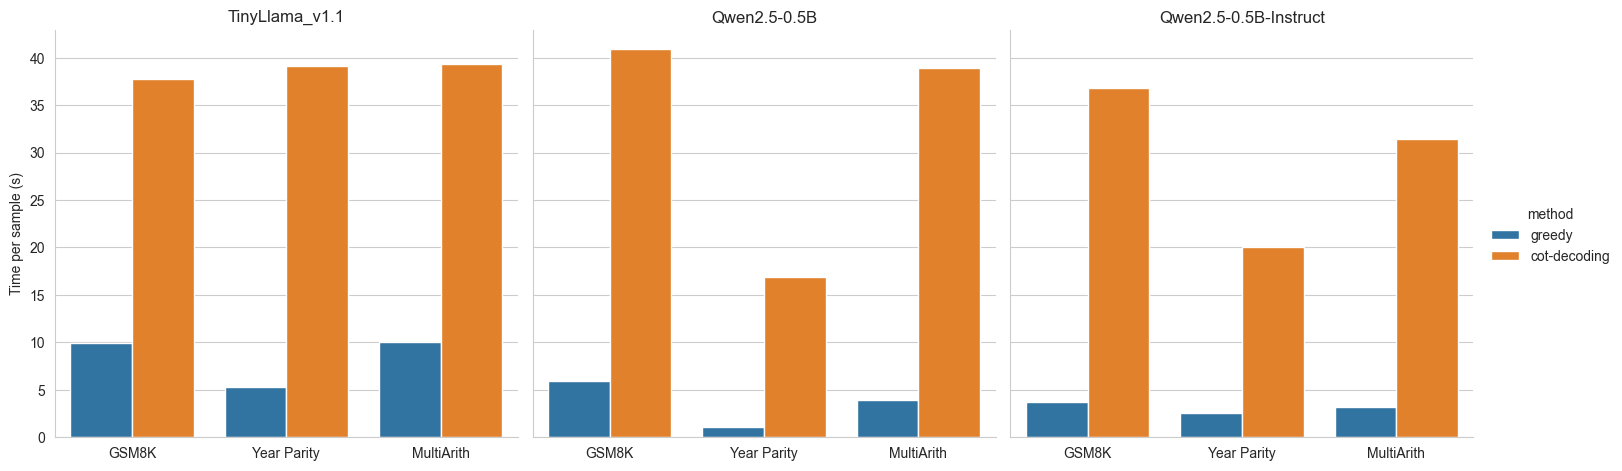

In [17]:
#plot for time
sns.set_style('whitegrid')
c = sns.catplot(
    df, kind="bar",
    x="dataset", y="time_per_sample", col="model", hue="method"
)
#plt.legend(loc='upper left')
c.set_axis_labels("", "Time per sample (s)")
for (col_key),ax in c.axes_dict.items():
    ax.set_title(f"{col_key}")